# Utilizzo libreria matplotlib
## Introduzione
La librerie matplotlib è una libreria che permette di produrre grafici in 2D e 3D. Di solito viene usata in combinazione con la libreria numpy e contiene diverse funzioni per fare i grafici di curve, vettori e gestire le figure e gli assi (https://matplotlib.org/stable/users/explain/quick_start.html).
Facciamo un esempio prendiamo la funzione $f(x) = x^2$ e facciamone il grafico.


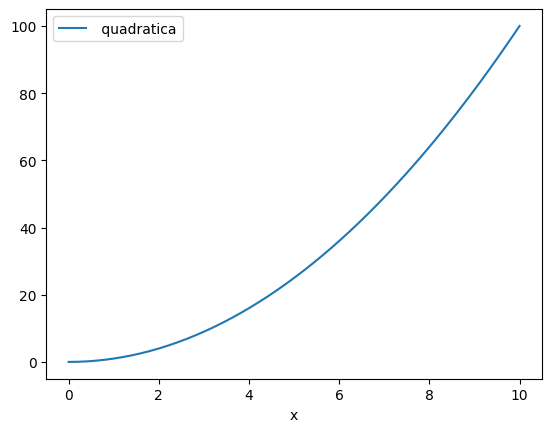

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# genero la variabile dipendente come array con spaziatura uniforme tra 0 e 10
x = np.linspace(0, 10, 200)
# variabile dipendente
y = x**2

fig, ax = plt.subplots()
ax.plot(x, y,label= " quadratica")
ax.set_xlabel("x")
ax.legend()
plt.show()

Proviamo ora a generare diverse figure con combinazioni diverse di assi:

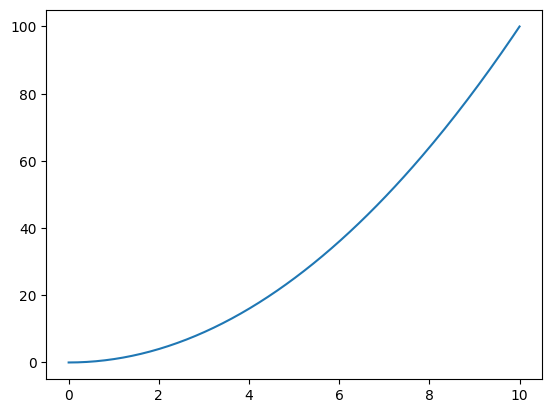

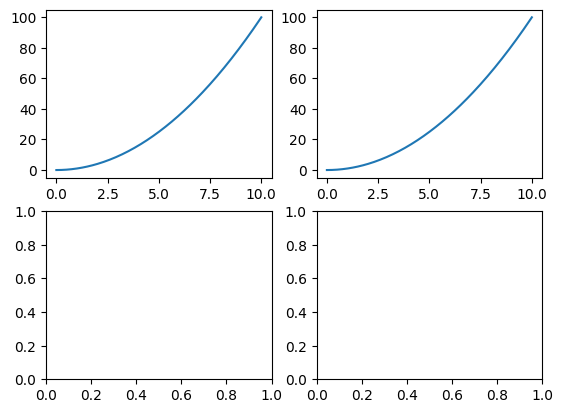

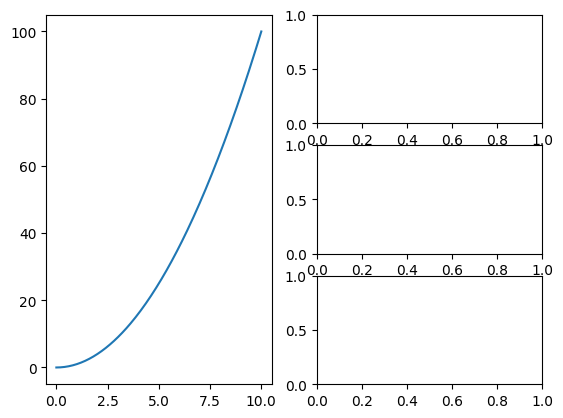

In [2]:
fig, ax = plt.subplots()       # a figure with a single Axes
ax.plot(x,y)

fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
axs[0,-1].plot(x,y) #plot in the first row last column
axs[0,0].plot(x,y) #plot in the first row first column

# a figure with one Axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([['left', 'ababco'],
                               ['left', 'right_middle'],
                               ['left', 'right_bottom']])
axs['left'].plot(x,y) # plotting in the eìleft axis

Generiamo ora il grafico un punto con un titolo:

Text(0.5, 1.0, 'punto con titolo')

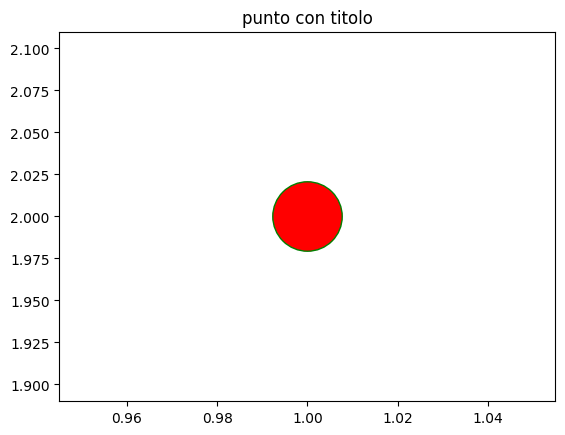

In [3]:
xx = 1
yy = 2
fig,ax = plt.subplots()
ax.plot(xx,yy,marker = 'o',mfc = 'r',mec = 'g',ms = 50) #marker o marker face color red marker edge color green size 50 dot
ax.set_title("punto con titolo")

Generiamo ora il grafico di un quadrato i cui vertici siano i punti
$$
  \overline{x_0} = \begin{bmatrix}
        0 \\ 0
         \end{bmatrix}; 
  \overline{x_1} = \begin{bmatrix}
        1 \\ 0
         \end{bmatrix};
  \overline{x_2} = \begin{bmatrix}
        1 \\ 1
         \end{bmatrix};
  \overline{x_3} = \begin{bmatrix}
        0 \\ 1
         \end{bmatrix};
  \overline{x_4} = \begin{bmatrix}
        0 \\ 0
         \end{bmatrix}
$$
dove l'ultimo punto serve solo a chiudre la figura.

[[0 1 1 0 0]
 [0 0 1 1 0]]


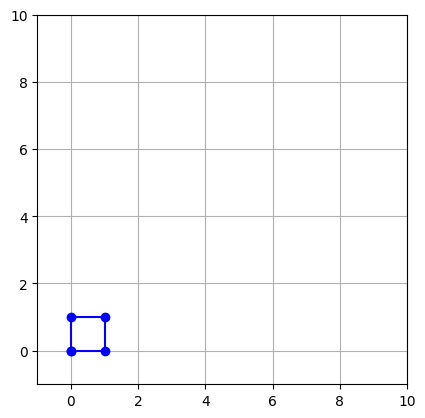

In [4]:
xx = np.array([0 ,1, 1, 0, 0])
yy = np.array([0 ,0, 1, 1, 0])
# associamo tutti i punti in una matrice per un motivo che sarà chiaro in seguito
# definifiamo la matrice dei punti del rettangolo come un matrice con due righe e npunti colonne
Pmat = np.concatenate([[xx],[yy]])
fig,ax = plt.subplots()
ax.plot(Pmat[0,:],Pmat[1,:],'o-b') #marker o line - color blue
ax.axis([-1, 10, -1, 10])
ax.grid(True)
ax.set_aspect('equal', adjustable='box')
plt.draw()
print(Pmat)

Proviamo ora a traslare o routare il rettangolo disegnato.

Per spostare il punto i lungo l'asse x di una quantità dx basterà definire il vettore spostamento come ad esempio $\overline{v_x} = [dx,0]^T$ e sommarlo al punto relativo vertice del rettangolo e cioè:

$$
  \overline{x_i'} = \overline{x_i} +  \overline{v_x}
$$

Chiaramente possiamo fare lo stesso lungo l'asse delle con $\overline{v_y} = [0,dy]^T$.

E nel caso di una traslazione generica basterà definire il vettore  generico $\overline{v} = [dx,dy]^T$.

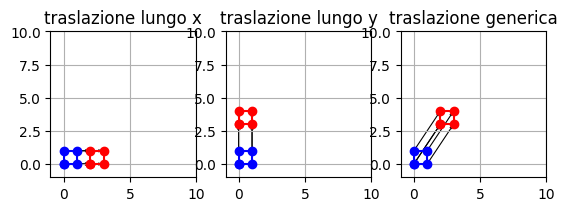

In [5]:
dx = 2
dy = 3
#definiamo gli array di spostamento
vx = np.array([dx,0])
vy = np.array([0,dy])
v = np.array([dx,dy])

# trasliamo la matrice Pmat utilizzando l'operatore somma tra array di Python
Pmatvx = Pmat+vx[:,np.newaxis] # il comando finale è necessario per rendere il vettore colonna 
Pmatvy = Pmat+vy[:,np.newaxis]
Pmatv  = Pmat+v[:,np.newaxis]

fig, axs = plt.subplots(1,3)  # a figure with a 1x3 grid of Axes
# figura traslazione in x
axs[0].plot(Pmat[0,:],Pmat[1,:],'o-b') #plot in the first row last column
axs[0].plot(Pmatvx[0,:],Pmatvx[1,:],'o-r') #plot in the first row last column
axs[0].quiver(Pmat[0,:],Pmat[1,:],vx[0],vx[1],angles='xy', scale_units='xy', scale=1)
axs[0].axis([-1, 10, -1, 10])
axs[0].grid(True)
axs[0].set_aspect('equal', adjustable='box')
axs[0].set_title("traslazione lungo x")
plt.draw()

# figura traslazione in y
axs[1].plot(Pmat[0,:],Pmat[1,:],'o-b') #plot in the first row last column
axs[1].plot(Pmatvy[0,:],Pmatvy[1,:],'o-r') #plot in the first row last column
axs[1].quiver(Pmat[0,:],Pmat[1,:],vy[0],vy[1],angles='xy', scale_units='xy', scale=1)
axs[1].axis([-1, 10, -1, 10])
axs[1].grid(True)
axs[1].set_aspect('equal', adjustable='box')
axs[1].set_title("traslazione lungo y")
plt.draw()

# figura traslazione generica
axs[2].plot(Pmat[0,:],Pmat[1,:],'o-b') #plot in the first row last column
axs[2].plot(Pmatv[0,:],Pmatv[1,:],'o-r') #plot in the first row last column
axs[2].quiver(Pmat[0,:],Pmat[1,:],v[0],v[1],angles='xy', scale_units='xy', scale=1)
axs[2].axis([-1, 10, -1, 10])
axs[2].grid(True)
axs[2].set_aspect('equal', adjustable='box')
axs[2].set_title("traslazione generica")
plt.draw()

Ora proviamo a routare i punti del rettangolo rispetto all'origine. Per ottenere la nuova posizione del vertice i-esimo basterà utilizare la matrice di rotazione
$$
  \overline{x_i'} = \overline{\overline{R}} \overline{x_i}
$$


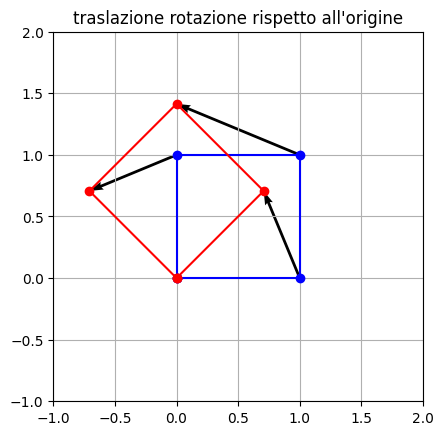

In [6]:
def gen_mat(theta):
  R= [[np.cos(theta),-np.sin(theta)],
      [np.sin(theta),np.cos(theta)]]
  return R
theta = np.pi/4
R = gen_mat(theta)

Pmatrot = R@Pmat
fig, ax = plt.subplots()  # a figure
# figura rotazione intorno all'origine
ax.plot(Pmat[0,:],Pmat[1,:],'o-b') #plot in the first row last column
ax.plot(Pmatrot[0,:],Pmatrot[1,:],'o-r') #plot in the first row last column
ax.quiver(Pmat[0,:],Pmat[1,:],Pmatrot[0,:]-Pmat[0,:],Pmatrot[1,:]-Pmat[1,:],angles='xy', scale_units='xy', scale=1)
ax.axis([-1, 2, -1, 2])
ax.grid(True)
ax.set_aspect('equal', adjustable='box')
ax.set_title("traslazione rotazione rispetto all'origine")
plt.draw()

Per ruotare rispetto ad un altro punto P= [Px,Py] basterà applicare una traslazione  in modo che il punto cada sull'origine, ruotare il corpo e poi effettuare la traslazione opposta, 


$$
  \overline{x_i'} = \overline{\overline{R}} (\overline{x_i} - \overline{v_P}) + \overline{v_P} 
$$

Proviamo per esempio a ruotare il corpo rispetto al baricentro.

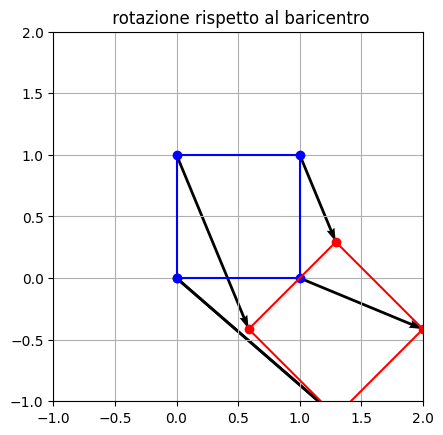

In [7]:
#vp = np.sum(Pmat[:,0:-1],1)/4 # tolgo il punto ripetuto
vp = np.array([2,1])
PmatrotG =  R@(Pmat- vp[:,np.newaxis]) + vp[:,np.newaxis]

fig, ax = plt.subplots()  # a figure
# figura rotazione intorno al baricentro
ax.plot(Pmat[0,:],Pmat[1,:],'o-b') #plot in the first row last column
ax.plot(PmatrotG[0,:],PmatrotG[1,:],'o-r') #plot in the first row last column
ax.quiver(Pmat[0,:],Pmat[1,:],PmatrotG[0,:]-Pmat[0,:],PmatrotG[1,:]-Pmat[1,:],angles='xy', scale_units='xy', scale=1)
ax.axis([-1, 2, -1, 2])
ax.grid(True)
ax.set_aspect('equal', adjustable='box')
ax.set_title(" rotazione rispetto al baricentro")
plt.draw()

In [ ]:
np.zeros(3)


Esercizi:
 1. plot di triangolo (...esagono) e spostatamento e rotazione
 2. plot di un triagnolo che ruota a velocità angolare uniforme rispetto ad un polo (grafici statici)
 3. animazione della rotazione con animation matplotlib: 
 4. frame rate di aggiornamento del grafico in tempo fisico
